# Projekt: Algorithmischer-Handel

Das Projekt Algorithmischer Handel basierend auf die Klassifikation automatisierte Handelsstrategien zu entwickeln.
Die Kauf- und Verkaufsentscheidung soll basierend auf den historischen und Echtzeit-Marktdaten funktionieren.
Die Klassifikation generiert die Vohersage, um dann zu schauen, ob die Aktie gekauft(long) oder verkauft(short) werden soll.

Das Projekt muss unter folgenden Schritte aufgeteilt werden:
1. Die Datenbeschaffung und aufbereitung
2. Datenanalyse
3. Vorbereitung der Trainingsdaten
4. Modellierung
5. Bewertimg der Genauigkeit und Zuverlässigkeit der entwickelten Methode
6. Backtesting mit Historiche Daten

# 1. Datenbeschaffung und aufbereitung

<h2>1.1 Datenbeschaffung</h2>

Es müssen einige Bibliotheken hinzugefügt werden. 
Als erstes muss yfinance hinzugefügt werden, diese ermöglich den zugriff auf Aktiendaten zuzugreifen.

In [1]:
!pip install yfinance
!pip install pandas


[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.1 -> 24.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Nachdem die benötigten Bibliotheken hinzugefügt wurden müssen diese importiert werden

In [2]:
import yfinance as yf
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import webbrowser

Der user soll die möglichkeit bekommen selber die Aktie zu bestimmen, dennoch wird eine Validierung eingebaut die überprüft, ob die Aktie vorhanden ist oder nicht

In [13]:
stock = input("Geben Sie bitte die Aktienkürzel ein: ").upper()
#stock = "MC.PA"
stock_info =  yf.Ticker(stock).info
try:
        if 'shortName' in stock_info and stock_info['shortName']:
            print(f"Die Aktie lautet: {stock_info['shortName']}")
            print(stock_info)
            url = 'https://de.tradingview.com/chart/?symbol=NASDAQ%3AAMZN'
#           webbrowser.open(url)
        else:
            raise Exception (f"Die Aktie: {stock} ist nicht vorhanden")
except Exception as err:
        print(err)

Geben Sie bitte die Aktienkürzel ein:  AMZN


Die Aktie lautet: Amazon.com, Inc.
{'address1': '410 Terry Avenue North', 'city': 'Seattle', 'state': 'WA', 'zip': '98109-5210', 'country': 'United States', 'phone': '206 266 1000', 'website': 'https://www.aboutamazon.com', 'industry': 'Internet Retail', 'industryKey': 'internet-retail', 'industryDisp': 'Internet Retail', 'sector': 'Consumer Cyclical', 'sectorKey': 'consumer-cyclical', 'sectorDisp': 'Consumer Cyclical', 'longBusinessSummary': "Amazon.com, Inc. engages in the retail sale of consumer products, advertising, and subscriptions service through online and physical stores in North America and internationally. The company operates through three segments: North America, International, and Amazon Web Services (AWS). It also manufactures and sells electronic devices, including Kindle, Fire tablets, Fire TVs, Echo, Ring, Blink, and eero; and develops and produces media content. In addition, the company offers programs that enable sellers to sell their products in its stores; and pr

Nachdem die Validation steht kann mit der Variable "stock_info" die Daten heruntergeladen werden.
Hierzu werden die Daten vom aktuellen Tag bis vor einem Jahr verwendet.

In [4]:
print("---Metadaten---")
print(stock_info['symbol'])
print(datetime.today().strftime('%Y-%m-%d'))
print((datetime.today().replace(year=datetime.today().year - 1)).strftime('%Y-%m-%d'))
try:
    stock_data = yf.download(
                    stock_info['symbol'],
                    start = (datetime.today().replace(year=datetime.today().year - 1)).strftime('%Y-%m-%d'), 
                    end=datetime.today().strftime('%Y-%m-%d'))
except Exception as err:
    print(f"Das Herunterladen der Datei war nicht erfolgreich: {err}")
print(f"--------------------------Aktiendaten von {stock_info['shortName']}--------------------------")
print(stock_data)
print(f"------------------------------------------------------------------------------------")

---Metadaten---
MC.PA
2024-07-11
2023-07-11


[*********************100%%**********************]  1 of 1 completed

--------------------------Aktiendaten von LVMH--------------------------
                  Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2023-07-11  840.000000  853.000000  837.000000  849.299988  834.687988  295807
2023-07-12  852.700012  867.799988  848.500000  866.700012  851.788696  323888
2023-07-13  874.299988  884.500000  869.799988  877.299988  862.206299  324073
2023-07-14  872.400024  892.700012  871.200012  892.299988  876.948181  301762
2023-07-17  865.599976  869.500000  848.099976  859.000000  844.221130  358674
...                ...         ...         ...         ...         ...     ...
2024-07-04  719.799988  722.299988  717.400024  719.799988  719.799988  177633
2024-07-05  723.900024  726.000000  712.599976  716.400024  716.400024  172452
2024-07-08  711.000000  719.299988  695.700012  695.700012  695.700012  475097
2024-07-09  697.000000  698.299988  685.599976  686.900024

Durch die erlangten können wir festhalten das wir folgende Werte erhalten:
1. Date: Aktienwerte für den tag
2. Open: Der Eröffnungskurs der Aktie 
3. High: Der höchste Kurs der Aktie der am diesem Tag stattgefunden hast
4. Low:  Der niedrigste Kurs der Aktie der am diesem Tag stattgefunden hast
5. Adj Close: Dieser Kurs zeigt den gereinigt Schlusskurs an mit berücksichtigung auf die Dividende, Aktiensplits etc.
6. Volume: Die Anzahl der gehandelten Aktien

In [5]:
stock_data.ffill(inplace=True)

Mit dem Befehl wurde die Datei Bereinigt und passend Convertiert

In [6]:
# Relevante Merkmale auswählen
stock_data['ReturnOnCapital'] = stock_data['Close'].pct_change()
stock_data.dropna(inplace=True)
stock_data

,Open,High,Low,Close,Adj Close,Volume,ReturnOnCapital
Date,,,,,,,
2023-07-12,852.700012,867.799988,848.500000,866.700012,851.788696,323888,0.020487
2023-07-13,874.299988,884.500000,869.799988,877.299988,862.206299,324073,0.012230
2023-07-14,872.400024,892.700012,871.200012,892.299988,876.948181,301762,0.017098
2023-07-17,865.599976,869.500000,848.099976,859.000000,844.221130,358674,-0.037319
2023-07-18,860.400024,869.400024,851.000000,859.299988,844.515930,226764,0.000349
...,...,...,...,...,...,...,...
2024-07-04,719.799988,722.299988,717.400024,719.799988,719.799988,177633,0.006995
2024-07-05,723.900024,726.000000,712.599976,716.400024,716.400024,172452,-0.004723
2024-07-08,711.000000,719.299988,695.700012,695.700012,695.700012,475097,-0.028894


In [7]:
# Berechnung der Weighted Moving Averages
def weighted_moving_average(data, window):
    weights = np.arange(1, window + 1)
    wma = data.rolling(window=window).apply(lambda prices: np.dot(prices, weights) / weights.sum(), raw=True)
    return wma
    
# Berechnung des Hull Moving Averages
def hull_moving_average(data, window):
    half_length = int(window / 2)
    sqrt_length = int(np.sqrt(window))
    wma1 = 2 * data.rolling(window=half_length).mean() - data.rolling(window=window).mean()
    hma = wma1.rolling(window=sqrt_length).mean()
    return hma
# Berechnung der gleitenden Durchschnitte
stock_data['SMA_20'] = stock_data['Close'].rolling(window=20).mean()
stock_data['SMA_50'] = stock_data['Close'].rolling(window=50).mean()
stock_data['WMA_20'] = weighted_moving_average(stock_data['Close'], 20)
stock_data['WMA_50'] = weighted_moving_average(stock_data['Close'], 50)
stock_data['HMA_20'] = hull_moving_average(stock_data['Close'], 20)
stock_data['HMA_50'] = hull_moving_average(stock_data['Close'], 50)
stock_data.head(30)

,Open,High,Low,Close,Adj Close,Volume,ReturnOnCapital,SMA_20,SMA_50,WMA_20,WMA_50,HMA_20,HMA_50
Date,,,,,,,,,,,,,
2023-07-12,852.700012,867.799988,848.500000,866.700012,851.788696,323888,0.020487,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-13,874.299988,884.500000,869.799988,877.299988,862.206299,324073,0.012230,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-14,872.400024,892.700012,871.200012,892.299988,876.948181,301762,0.017098,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-17,865.599976,869.500000,848.099976,859.000000,844.221130,358674,-0.037319,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-18,860.400024,869.400024,851.000000,859.299988,844.515930,226764,0.000349,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-19,870.099976,871.299988,846.099976,850.400024,835.769104,295475,-0.010357,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-20,845.500000,854.799988,840.400024,854.000000,839.307129,324118,0.004233,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-21,856.099976,867.900024,852.000000,867.900024,852.968018,280046,0.016276,NaN,NaN,NaN,NaN,NaN,NaN
2023-07-24,861.000000,865.400024,847.000000,857.599976,842.845154,205344,-0.011868,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# Generierung von Kauf- und Verkaufssignalen
stock_data['Signal_SMA'] = 0  # Initialisieren der Signalspalte
stock_data['Signal_HMA'] = 0  # Initialisieren der Signalspalte
stock_data['Signal_WMA'] = 0  # Initialisieren der Signalspalte

# Kaufsignal: Wenn SMA_20 > SMA_50 und ReturnOnCapital positiv ist
stock_data.loc[(stock_data['SMA_20'] > stock_data['SMA_50']) & (stock_data['ReturnOnCapital'] > 0), 'Signal_SMA'] = 1
stock_data.loc[(stock_data['HMA_20'] > stock_data['HMA_50']) & (stock_data['ReturnOnCapital'] > 0), 'Signal_HMA'] = 1
stock_data.loc[(stock_data['WMA_20'] > stock_data['WMA_50']) & (stock_data['ReturnOnCapital'] > 0), 'Signal_WMA'] = 1

# Verkaufssignal: Wenn SMA_20 < SMA_50 und ReturnOnCapital negativ ist
stock_data.loc[(stock_data['SMA_20'] < stock_data['SMA_50']) & (stock_data['ReturnOnCapital'] < 0), 'Signal_SMA'] = -1
stock_data.loc[(stock_data['HMA_20'] < stock_data['HMA_50']) & (stock_data['ReturnOnCapital'] < 0), 'Signal_HMA'] = -1
stock_data.loc[(stock_data['WMA_20'] < stock_data['WMA_50']) & (stock_data['ReturnOnCapital'] < 0), 'Signal_WMA'] = -1

# Bestimmen der Positionen basierend auf den Signalen
stock_data['Position_SMA'] = stock_data['Signal_SMA'].diff()
stock_data['Position_HMA'] = stock_data['Signal_HMA'].diff()
stock_data['Position_WMA'] = stock_data['Signal_WMA'].diff()

stock_data.dropna(inplace=True)
print(stock_data.head(60))


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2023-09-27  704.000000  708.000000  697.299988  698.700012  686.679016   
2023-09-28  695.000000  708.299988  693.299988  706.000000  693.853394   
2023-09-29  722.000000  732.599976  716.400024  716.400024  704.074524   
2023-10-02  721.000000  729.900024  709.400024  714.900024  702.600342   
2023-10-03  709.000000  718.700012  705.099976  705.299988  693.165466   
2023-10-04  702.400024  721.900024  700.799988  712.500000  700.241638   
2023-10-05  715.599976  723.299988  713.299988  720.599976  708.202271   
2023-10-06  726.000000  731.299988  715.799988  729.700012  717.145691   
2023-10-09  724.900024  724.900024  707.700012  710.700012  698.472595   
2023-10-10  723.000000  734.500000  717.799988  733.500000  720.880310   
2023-10-11  691.000000  699.200012  671.500000  686.099976  674.295776   
2023-10-12  689.799988  690.299988  67

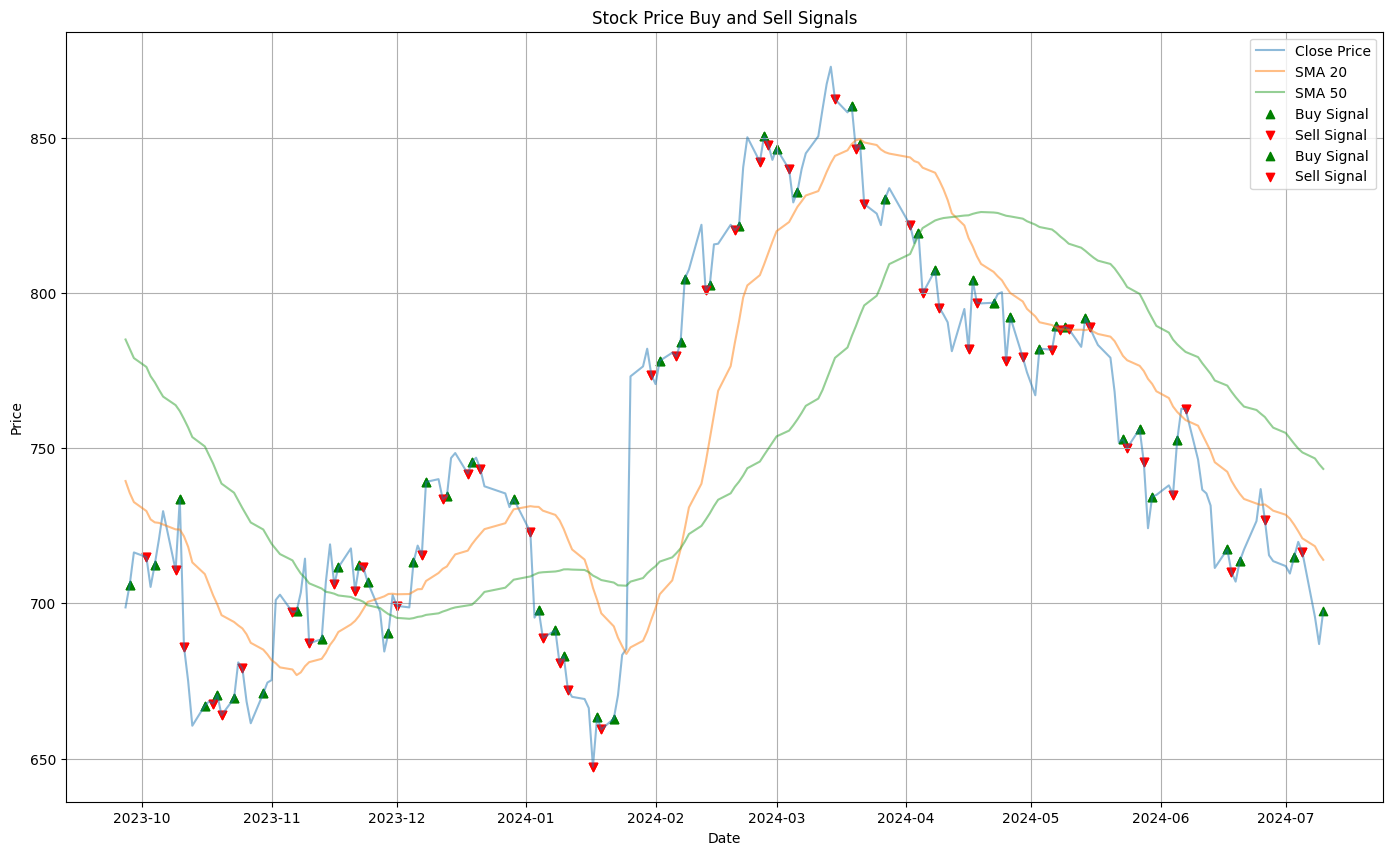

In [9]:
# Visualisierung der Signale
plt.figure(figsize=(17,10))
plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['SMA_20'], label='SMA 20', alpha=0.5)
plt.plot(stock_data['SMA_50'], label='SMA 50', alpha=0.5)

# Erhalten der Indizes für Kauf- und Verkaufssignale
buy_signals = stock_data.loc[stock_data['Position_SMA'] == 1].index
sell_signals = stock_data.loc[stock_data['Position_SMA'] == -1].index
# Überprüfen der Bedingung buy_signals <= sell_signals
if len(buy_signals) <= len(sell_signals):
    # Sicherstellen, dass die Signale korrekt dargestellt werden
    plt.scatter(buy_signals, stock_data.loc[buy_signals, 'Close'], label='Buy Signal', marker='^', color='green', alpha=1)
    plt.scatter(sell_signals, stock_data.loc[sell_signals, 'Close'], label='Sell Signal', marker='v', color='red', alpha=1)
else:
    # Wenn buy_signals größer sind als sell_signals, nur die ersten sell_signals anzeigen
    plt.scatter(buy_signals[:len(sell_signals)], stock_data.loc[buy_signals[:len(sell_signals)], 'Close'], label='Buy Signal', marker='^', color='green', alpha=1)
    plt.scatter(sell_signals, stock_data.loc[sell_signals, 'Close'], label='Sell Signal', marker='v', color='red', alpha=1)

# Sicherstellen, dass die Signale korrekt dargestellt werden
plt.scatter(buy_signals, stock_data.loc[buy_signals, 'Close'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(sell_signals, stock_data.loc[sell_signals, 'Close'], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title('Stock Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

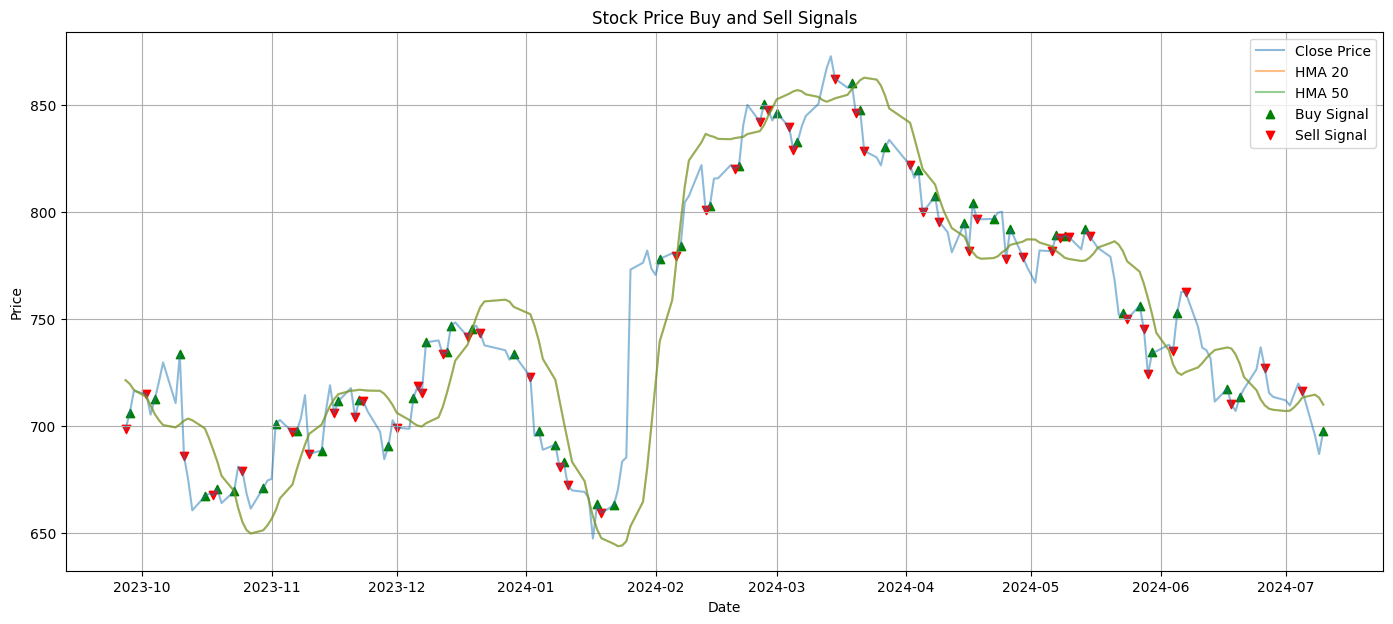

In [10]:
# Visualisierung der Signale
plt.figure(figsize=(17,7))
plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['HMA_20'], label='HMA 20', alpha=0.5)
plt.plot(stock_data['HMA_20'], label='HMA 50', alpha=0.5)

# Erhalten der Indizes für Kauf- und Verkaufssignale
buy_signals = stock_data.loc[stock_data['Position_HMA'] == 1].index
sell_signals = stock_data.loc[stock_data['Position_HMA'] == -1].index

# Sicherstellen, dass die Signale korrekt dargestellt werden
plt.scatter(buy_signals, stock_data.loc[buy_signals, 'Close'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(sell_signals, stock_data.loc[sell_signals, 'Close'], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title('Stock Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()

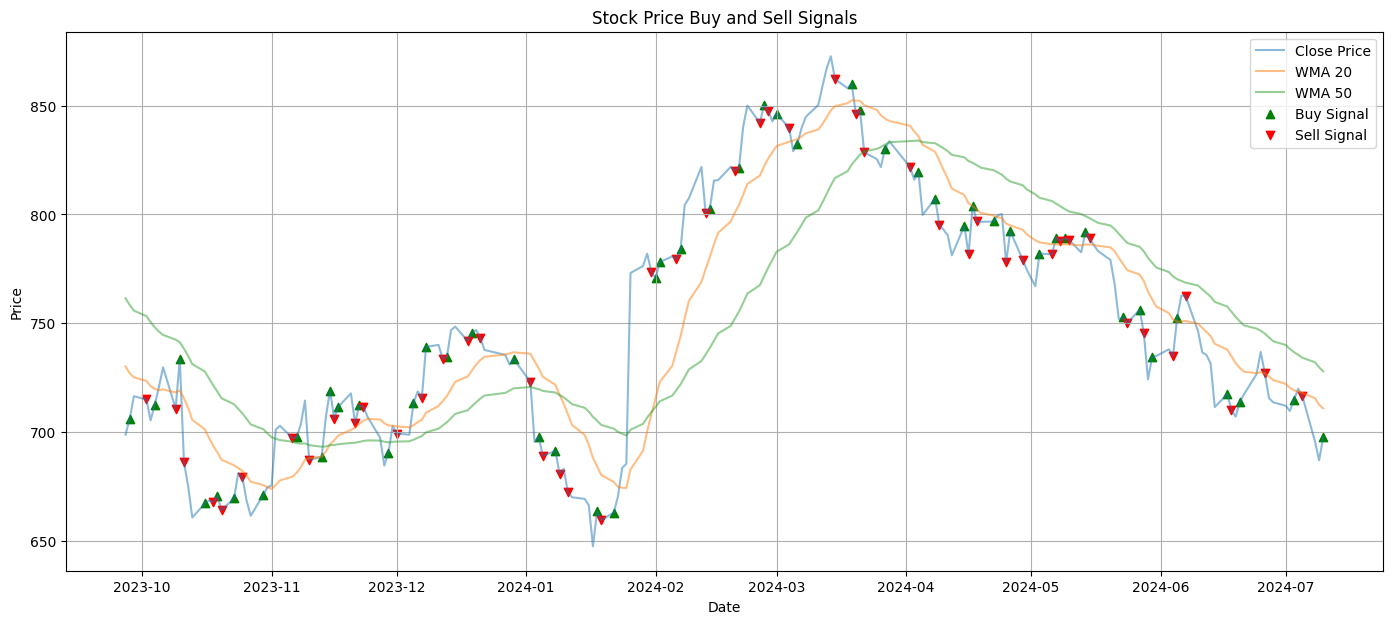

In [11]:
# Visualisierung der Signale
plt.figure(figsize=(17,7))
plt.plot(stock_data['Close'], label='Close Price', alpha=0.5)
plt.plot(stock_data['WMA_20'], label='WMA 20', alpha=0.5)
plt.plot(stock_data['WMA_50'], label='WMA 50', alpha=0.5)

# Erhalten der Indizes für Kauf- und Verkaufssignale
buy_signals = stock_data.loc[stock_data['Position_WMA'] == 1].index
sell_signals = stock_data.loc[stock_data['Position_WMA'] == -1].index

# Sicherstellen, dass die Signale korrekt dargestellt werden
plt.scatter(buy_signals, stock_data.loc[buy_signals, 'Close'], label='Buy Signal', marker='^', color='green', alpha=1)
plt.scatter(sell_signals, stock_data.loc[sell_signals, 'Close'], label='Sell Signal', marker='v', color='red', alpha=1)

plt.title('Stock Price Buy and Sell Signals')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()